In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import mahotas as mh
import json

In [3]:
import cactas as C

/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
DATAPATH = '/raid/mpsych/CACTAS/DATA/ESUS/'

In [5]:
with open("image_data_v3.json", "r") as fp:
    image_data = json.load(fp)
with open("label_data_v3.json", "r") as fp:
    label_data = json.load(fp)

In [6]:
with open(DATAPATH+'../ESUS_stroke_side.csv', 'r') as f:
    stroke_sides = f.read().replace('ESUS ','').split('\n')

STROKE_SIDES = {}
    
for l in stroke_sides[1:]:
    l_s = l.split(',')
    
    if len(l_s) != 5:
        continue
    
    id_ = l_s[0]
    age = l_s[1]
    sex = l_s[2]
    race = l_s[3]
    side = l_s[4]
    STROKE_SIDES[id_] = side

In [7]:
images, labels = C.Util.load(DATAPATH)

In [8]:
for key, val in image_data.items():
    stroke_side = STROKE_SIDES[key]
    print('file name', key)
    print('Stroke side', stroke_side)

file name 2
Stroke side R
file name 5
Stroke side R
file name 6
Stroke side L
file name 7
Stroke side L
file name 9
Stroke side R
file name 10
Stroke side L
file name 12
Stroke side L
file name 13
Stroke side L
file name 14
Stroke side L
file name 15
Stroke side L
file name 16
Stroke side L
file name 17
Stroke side R
file name 18
Stroke side L
file name 21
Stroke side R
file name 22
Stroke side L
file name 23
Stroke side L
file name 24
Stroke side R
file name 25
Stroke side L
file name 26
Stroke side R
file name 27
Stroke side R
file name 29
Stroke side R
file name 31
Stroke side L
file name 32
Stroke side R
file name 33
Stroke side R
file name 35
Stroke side L
file name 36
Stroke side R
file name 39
Stroke side L
file name 40
Stroke side R
file name 41
Stroke side R
file name 45
Stroke side L
file name 46
Stroke side R
file name 47
Stroke side L
file name 48
Stroke side L
file name 49
Stroke side R
file name 50
Stroke side R
file name 51
Stroke side L
file name 52
Stroke side R
file n

In [9]:
# normalize grayscale to 0..1
images, labels = C.Util.normalize(images, labels)

# for each scan
symp_i_patches = []
symp_l_patches = []
asymp_i_patches = []
asymp_l_patches = []

P=64

In [10]:
images.shape

(766, 512, 512, 1)

In [11]:
labels.shape

(766, 512, 512, 1)

In [17]:
# loop thru each slice
for i in range(labels.shape[0]):
    #print(labels[i].shape)
    bbox = mh.bbox(labels[i])
    
    #print(bbox)

    location = ''
    if (512 - bbox[0] < 256):
        location = 'L' # patient view
    else:
        location = 'R' # patient view
        
    increase_x = 10
    increase_y = 10
    increase_z = 0
    target_size = P
    
    
    if target_size:
        widthY = bbox[1]-bbox[0]
        widthX = bbox[3]-bbox[2]
        #print(widthY)
        #print(widthX)

        increase_x = (target_size - widthX) // 2
        increase_y = (target_size - widthY) // 2
        
        print(bbox)
        print(widthY, widthX, increase_x, increase_y)

        bufferY = 0
        if (bbox[0]-increase_y + bbox[1]+increase_y) != target_size:
            bufferY = 1

        bufferX = 0
        if (bbox[2]-increase_x + bbox[3]+increase_x) != target_size:
            bufferX = 1

    # crop label and image according to bbox but make it a little larger
    label_cropped = labels[bbox[0]-increase_y:bbox[1]+increase_y+bufferY,
                           bbox[0]-increase_y:bbox[1]+increase_y+bufferY,
                           bbox[2]-increase_x:bbox[3]+increase_x+bufferX]
    image_cropped = images[bbox[0]-increase_y:bbox[1]+increase_y+bufferY,
                           bbox[0]-increase_y:bbox[1]+increase_y+bufferY,
                           bbox[2]-increase_x:bbox[3]+increase_x+bufferX]


    if location == stroke_side:
        symp_i_patches.append(image_cropped[i])
        symp_l_patches.append(label_cropped[i])
    else:
        asymp_i_patches.append(image_cropped[i])
        asymp_l_patches.append(label_cropped[i])

    print(image_cropped.shape)
    print(label_cropped.shape)

[293 297 194 200   0   1]
4 6 29 30
(65, 65, 65, 1)
(65, 65, 65, 1)
[201 300 193 212   0   1]
99 19 22 -18
(64, 64, 64, 1)
(64, 64, 64, 1)
[202 300 195 210   0   1]
98 15 24 -17
(65, 65, 64, 1)
(65, 65, 64, 1)
[196 205 208 221   0   1]
9 13 25 27
(64, 64, 64, 1)
(64, 64, 64, 1)
[195 199 217 223   0   1]
4 6 29 30
(65, 65, 65, 1)
(65, 65, 65, 1)
[195 198 219 223   0   1]
3 4 30 30
(64, 64, 65, 1)
(64, 64, 65, 1)
[186 189 218 222   0   1]
3 4 30 30
(64, 64, 65, 1)
(64, 64, 65, 1)
[186 191 215 222   0   1]
5 7 28 29
(64, 64, 64, 1)
(64, 64, 64, 1)
[186 191 217 223   0   1]
5 6 29 29
(64, 64, 65, 1)
(64, 64, 65, 1)
[188 189 222 223   0   1]
1 1 31 31
(64, 64, 64, 1)
(64, 64, 64, 1)
[278 281 263 268   0   1]
3 5 29 30
(64, 64, 64, 1)
(64, 64, 64, 1)
[265 281 264 276   0   1]
16 12 26 24
(65, 65, 65, 1)
(65, 65, 65, 1)
[265 274 273 276   0   1]
9 3 30 27
(64, 64, 64, 1)
(64, 64, 64, 1)
[265 270 268 273   0   1]
5 5 29 29
(64, 64, 64, 1)
(64, 64, 64, 1)
[265 270 266 273   0   1]
5 7 28 29
(64

IndexError: index 65 is out of bounds for axis 0 with size 65

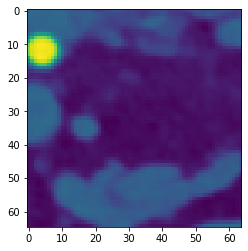

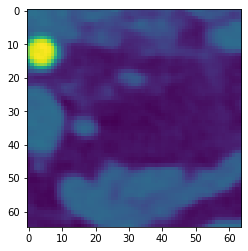

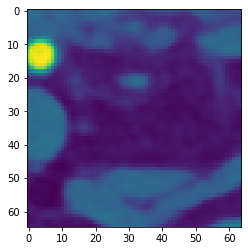

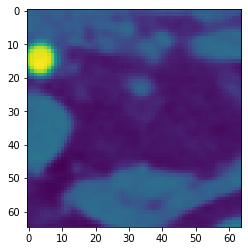

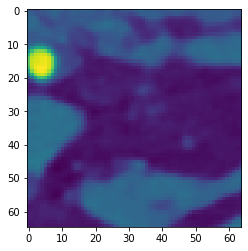

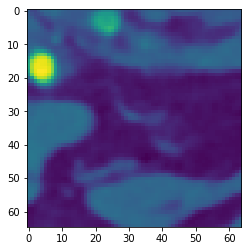

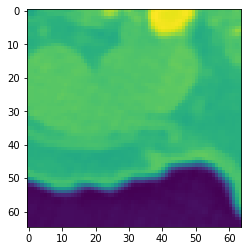

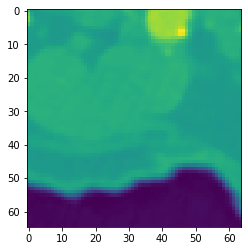

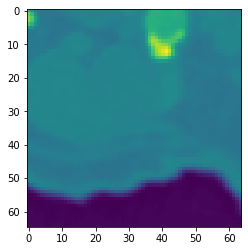

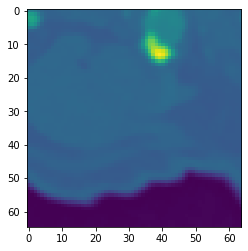

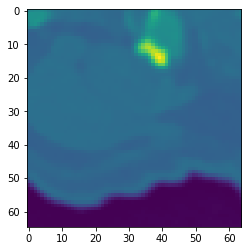

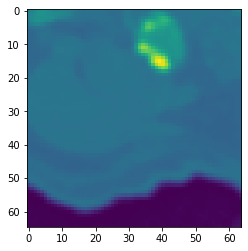

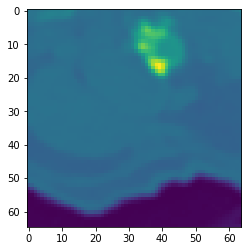

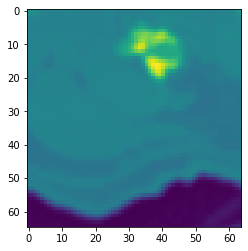

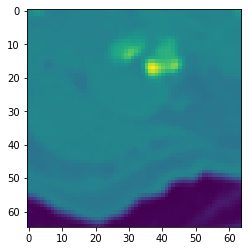

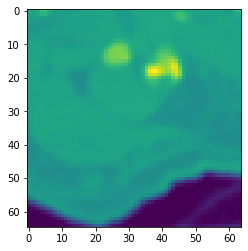

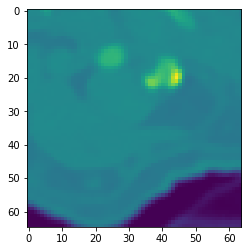

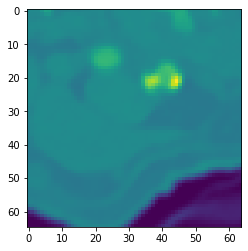

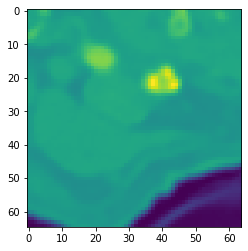

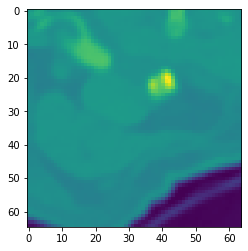

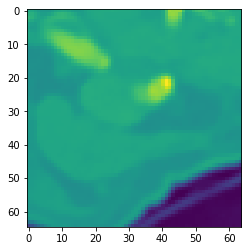

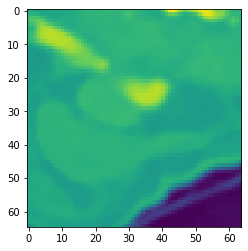

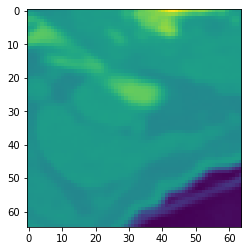

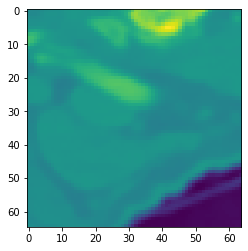

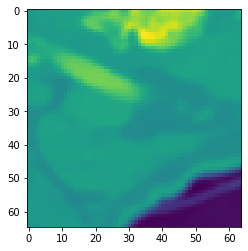

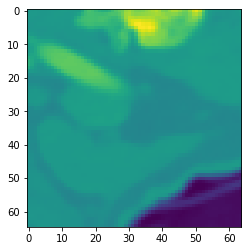

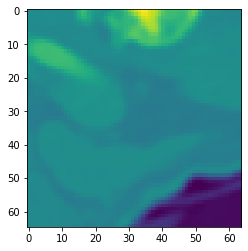

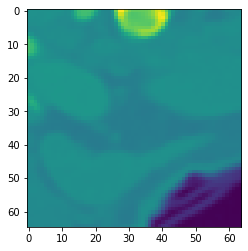

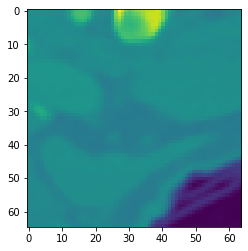

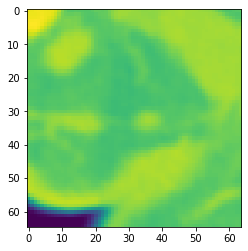

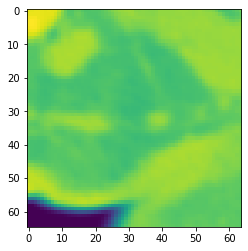

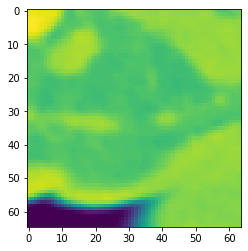

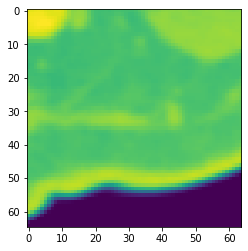

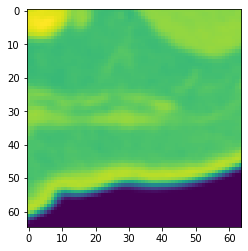

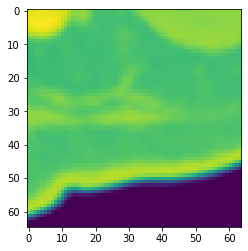

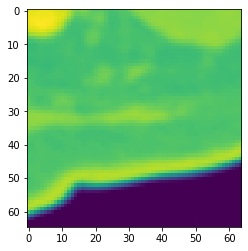

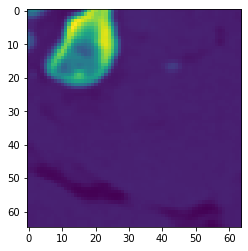

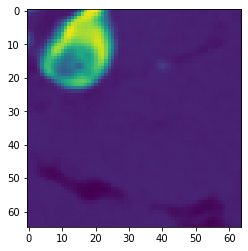

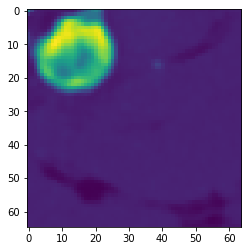

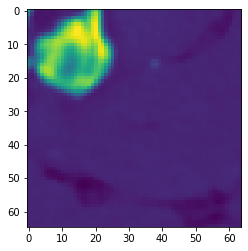

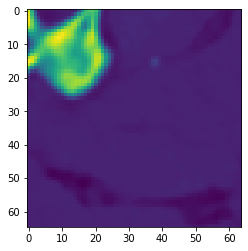

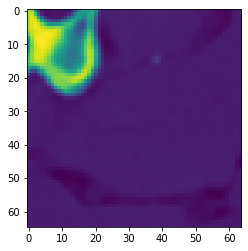

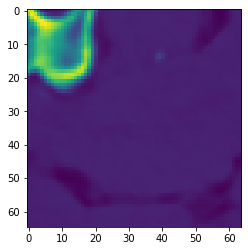

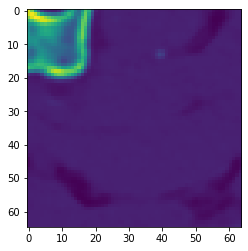

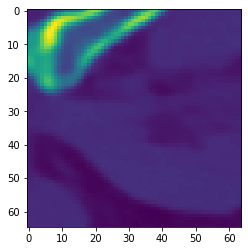

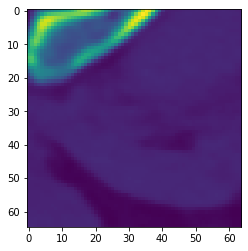

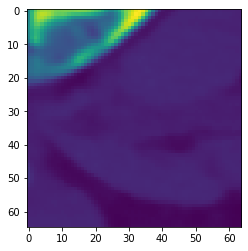

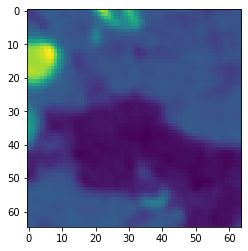

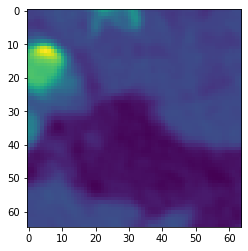

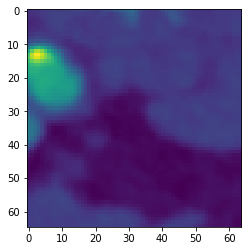

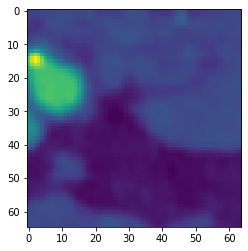

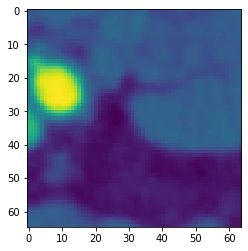

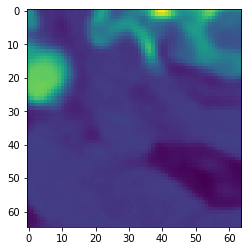

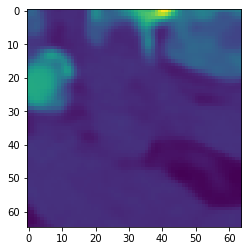

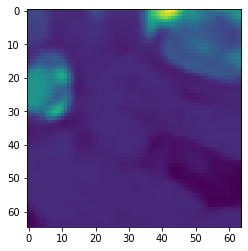

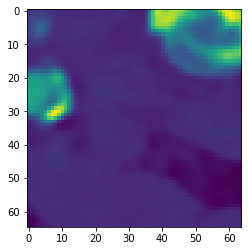

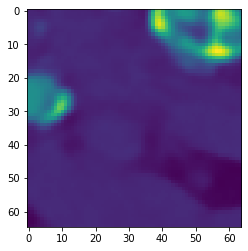

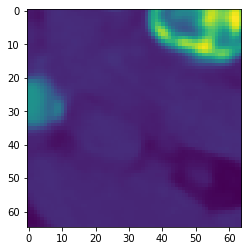

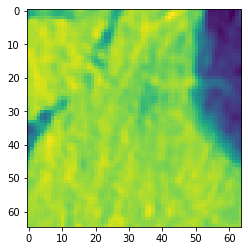

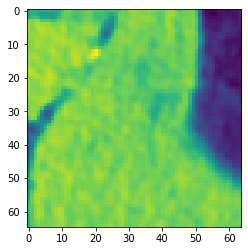

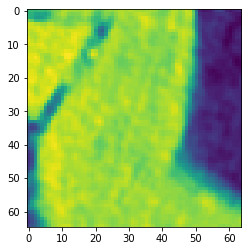

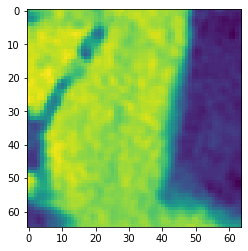

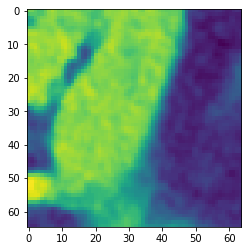

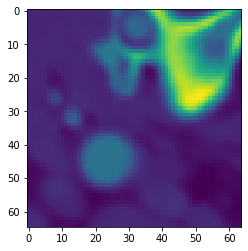

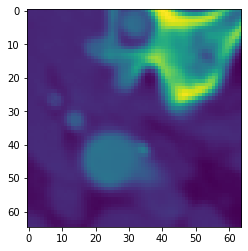

In [18]:
for i in range(len(image_cropped)):
    plt.imshow(image_cropped[i])
    plt.show()

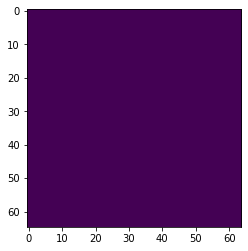

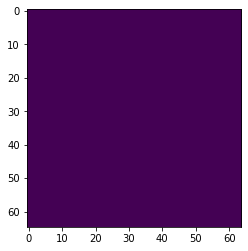

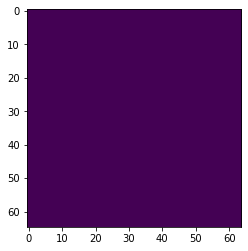

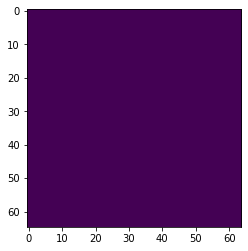

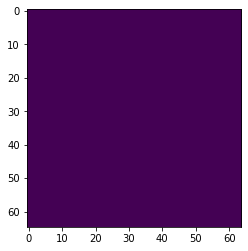

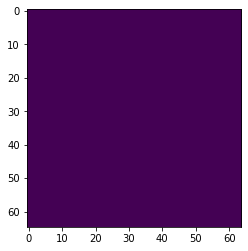

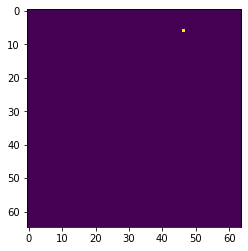

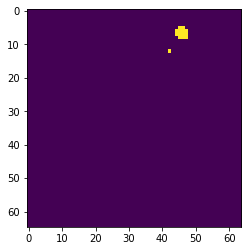

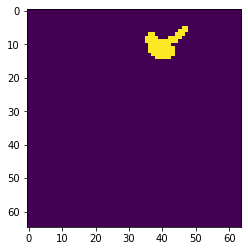

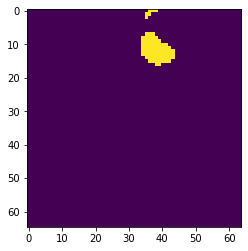

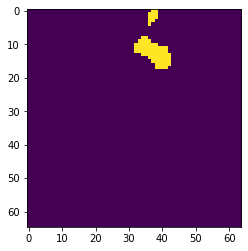

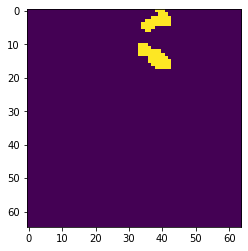

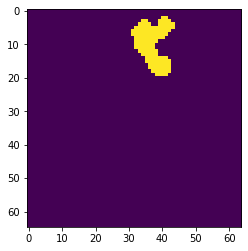

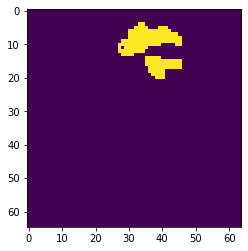

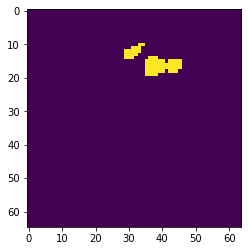

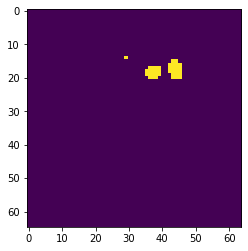

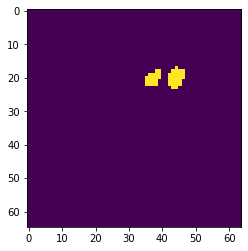

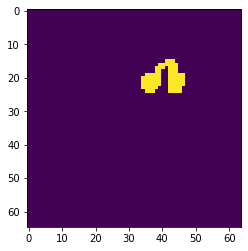

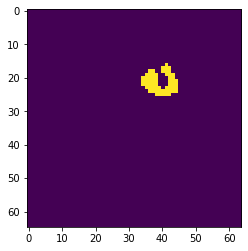

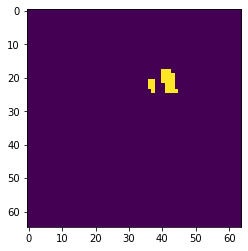

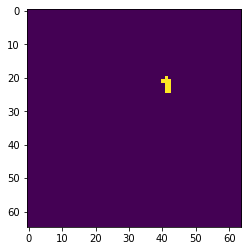

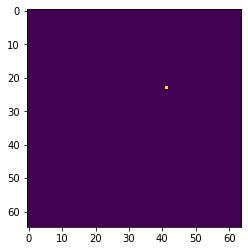

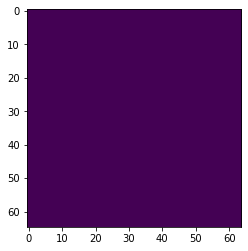

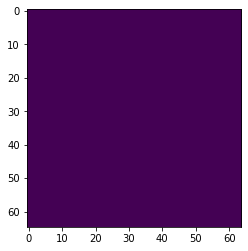

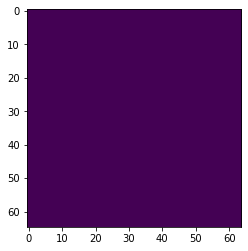

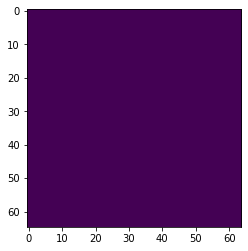

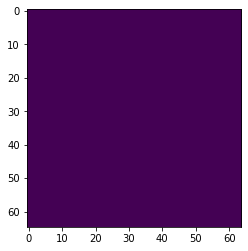

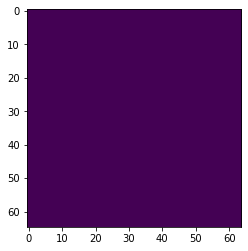

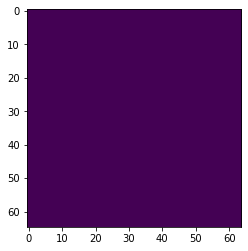

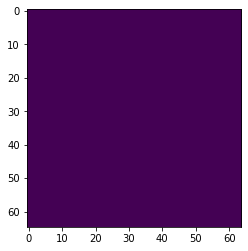

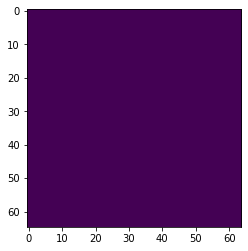

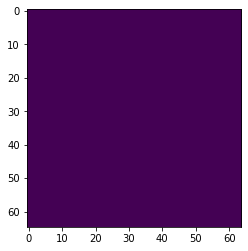

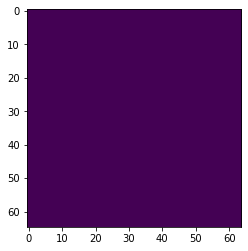

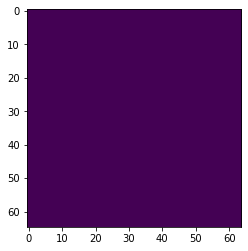

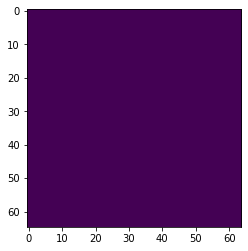

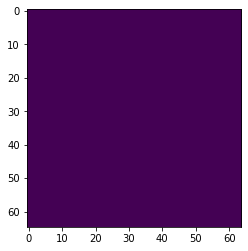

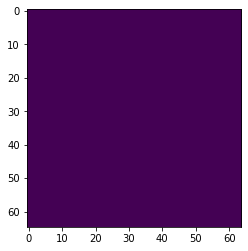

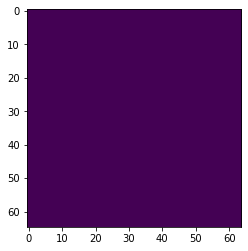

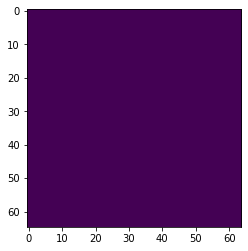

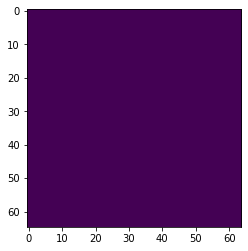

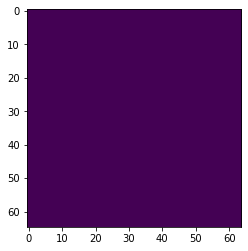

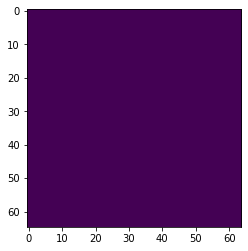

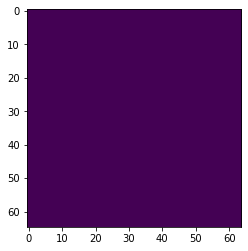

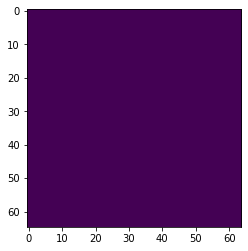

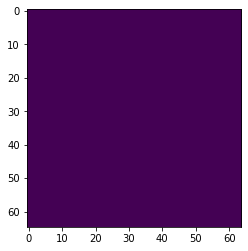

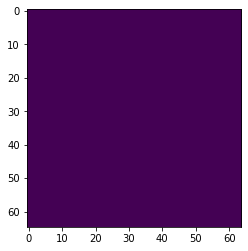

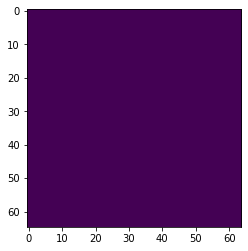

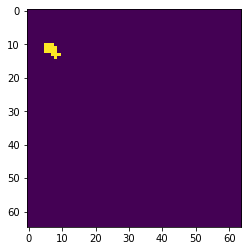

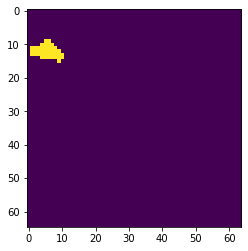

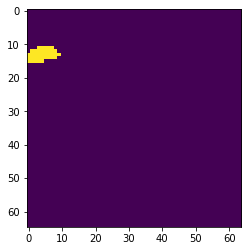

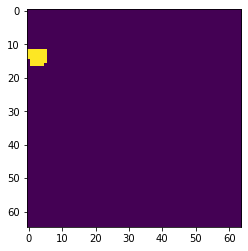

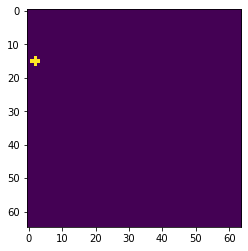

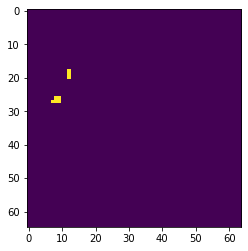

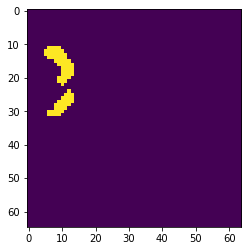

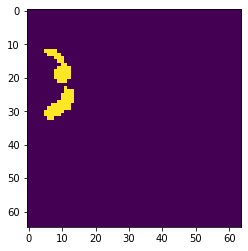

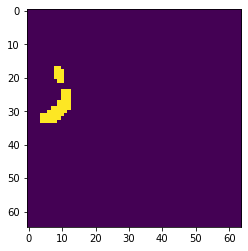

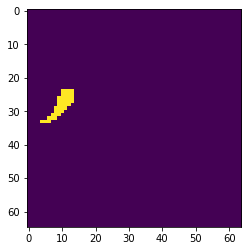

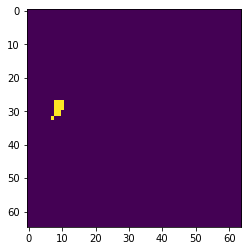

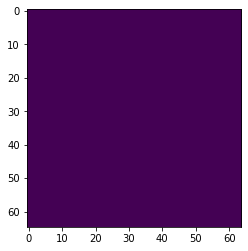

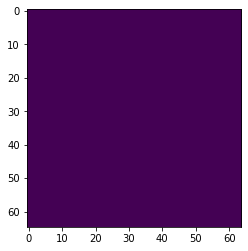

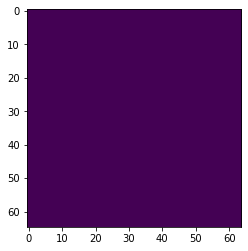

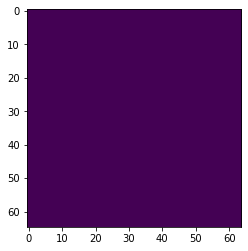

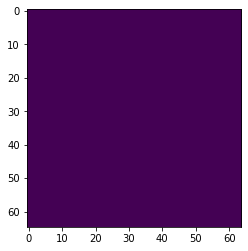

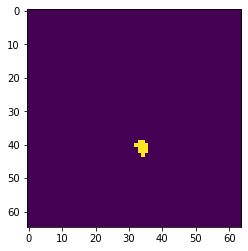

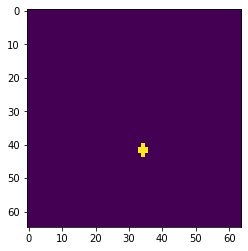

In [19]:
for i in range(len(label_cropped)):
    plt.imshow(label_cropped[i])
    plt.show()